In [13]:
!wget https://raw.githubusercontent.com/manifoldailearning/python-coding-examples/main/py4ds/Data%20Wrangling/HousePrices.csv
import pandas as pd
df = pd.read_csv("HousePrices.csv")
df.head() # first 5 rows

--2024-07-21 16:06:19--  https://raw.githubusercontent.com/manifoldailearning/python-coding-examples/main/py4ds/Data%20Wrangling/HousePrices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 526795 (514K) [text/plain]
Saving to: ‘HousePrices.csv.1’

HousePrices.csv.1   100%[===================>] 514.45K  --.-KB/s    in 0.03s   

2024-07-21 16:06:19 (14.6 MB/s) - ‘HousePrices.csv.1’ saved [526795/526795]



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [14]:
df["total_rooms"] = df["bedrooms"] + df["bathrooms"]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_rooms
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,4.50
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,7.50
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.00
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5.25
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,6.50


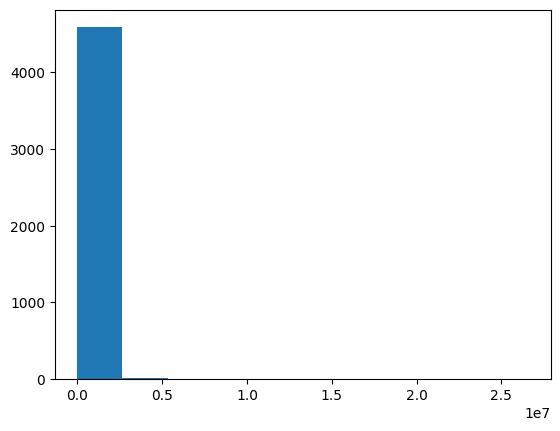

In [15]:
# Transformation of Columns
# Numerical data
# Log Transforamtions , Square Root Transformation & Box Cox Transformation

import matplotlib.pyplot as plt
plt.hist(df["price"])
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


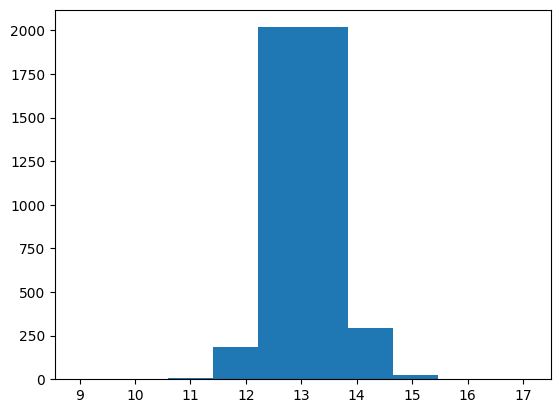

In [16]:
import numpy as np
df["log_price"] = np.log(df["price"])
# remove negative infinity
df = df[df["log_price"] > 0]
plt.hist(df["log_price"])
plt.show()

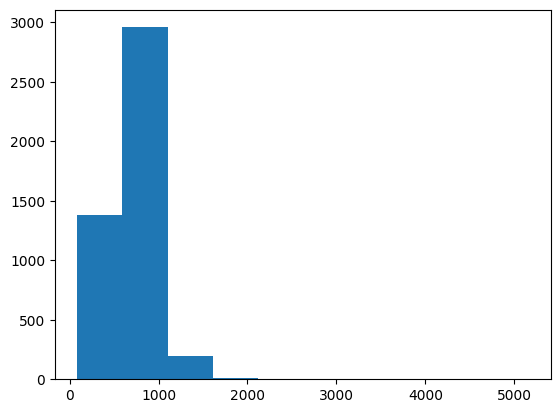

In [17]:
# square root transformation
df["sqrt_price"] = np.sqrt(df["price"])
plt.hist(df["sqrt_price"])
plt.show()

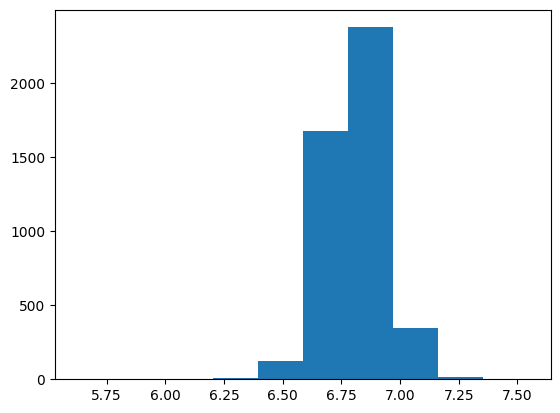

In [18]:
from scipy.stats import boxcox
df["boxcox_price"], _ = boxcox(df["price"])
plt.hist(df["boxcox_price"])
plt.show()

In [19]:
# log transformation - compress the scale of data
# bring large values closer to small ones

In [20]:
# Feature scaling
# Standardization
# Normalization (minmax scaling)

# Label Encoder
# OneHotEncoding

df['city'].nunique()

44

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['city'])

LabelEncoder()

In [22]:
le.classes_

array(['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue',
       'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill',
       'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City',
       'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore',
       'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina',
       'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point'], dtype=object)

In [23]:
df['city'] = le.transform(df['city'])

In [24]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,total_rooms,log_price,sqrt_price,boxcox_price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,36,WA 98133,USA,4.50,12.653958,559.464029,6.716206
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,35,WA 98119,USA,7.50,14.684290,1544.020725,7.147650
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,18,WA 98042,USA,5.00,12.742566,584.807661,6.737182
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,3,WA 98008,USA,5.25,12.948010,648.074070,6.785012
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,31,WA 98052,USA,6.50,13.217674,741.619849,6.846124


In [25]:
df[['city']]

,city
0,36
1,35
2,18
3,3
4,31
...,...
4595,35
4596,3
4597,32
4598,35


In [26]:
# OneHotEncoding
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,total_rooms,log_price,sqrt_price,boxcox_price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,36,WA 98133,USA,4.50,12.653958,559.464029,6.716206
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,35,WA 98119,USA,7.50,14.684290,1544.020725,7.147650
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,18,WA 98042,USA,5.00,12.742566,584.807661,6.737182
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,3,WA 98008,USA,5.25,12.948010,648.074070,6.785012
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,31,WA 98052,USA,6.50,13.217674,741.619849,6.846124


In [27]:
df["country"].nunique()

1

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(df[["city"]])

OneHotEncoder()

In [29]:
ohe.transform(df[["city"]]) # sparse matrix

<4551x44 sparse matrix of type '<class 'numpy.float64'>'
	with 4551 stored elements in Compressed Sparse Row format>

In [30]:
ohe.transform(df[["city"]]).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
pd.DataFrame(ohe.transform(df[["city"]]).todense(), columns=ohe.get_feature_names_out())

,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,...,city_34,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4547,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Apply
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,total_rooms,log_price,sqrt_price,boxcox_price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,36,WA 98133,USA,4.50,12.653958,559.464029,6.716206
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,35,WA 98119,USA,7.50,14.684290,1544.020725,7.147650
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,18,WA 98042,USA,5.00,12.742566,584.807661,6.737182
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,3,WA 98008,USA,5.25,12.948010,648.074070,6.785012
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,31,WA 98052,USA,6.50,13.217674,741.619849,6.846124


In [33]:
# access row and  transform using apply
def apply_transform(row):
  return row["bedrooms"] > 3

df["bedrooms_gt_3"] = df.apply(apply_transform, axis=1) # Row wise
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,total_rooms,log_price,sqrt_price,boxcox_price,bedrooms_gt_3
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,36,WA 98133,USA,4.50,12.653958,559.464029,6.716206,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,35,WA 98119,USA,7.50,14.684290,1544.020725,7.147650,True
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,18,WA 98042,USA,5.00,12.742566,584.807661,6.737182,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,3,WA 98008,USA,5.25,12.948010,648.074070,6.785012,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,31,WA 98052,USA,6.50,13.217674,741.619849,6.846124,True
